In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
# Droping the null value columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# rename the columns name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Classifying the target column
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [12]:
df['target'] =encode.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df.isna().sum()

target    0
text      0
dtype: int64

In [15]:
# Checking for duplicate values
df.duplicated().sum()

403

In [16]:
# Removing the duplicate values
df = df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA - Exploratory Data Analysis

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.value_counts(df['target'])

target
0    4516
1     653
dtype: int64

In [21]:
import matplotlib.pyplot as plt

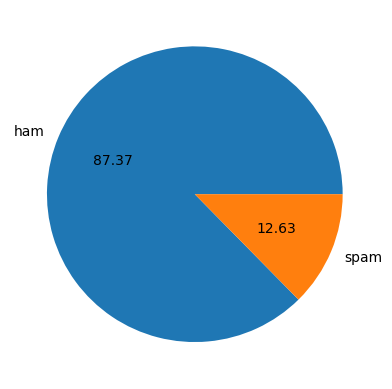

In [22]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
# data is Imbalanced

In [24]:
!pip install nltk

^C


In [26]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shashank_rp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# first column characters
# Second column words
# Third column senctence

In [28]:
df['num_char'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
# ham messages
df[df['target'] == 0][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [35]:
# spam messages
df[df['target'] == 1][['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [36]:
# ploting histogram

In [37]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

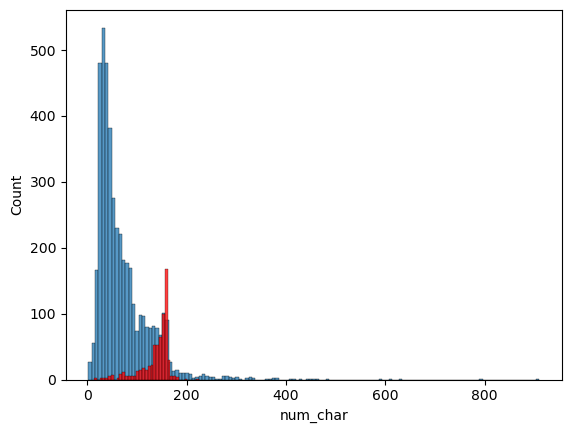

In [38]:
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'],color='r')

<Axes: xlabel='num_words', ylabel='Count'>

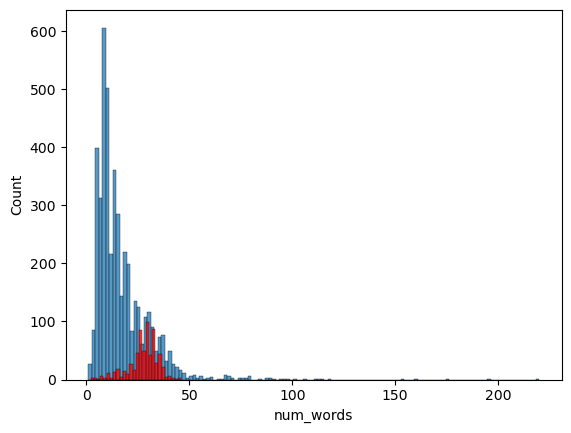

In [39]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='r')

<Axes: xlabel='num_sent', ylabel='Count'>

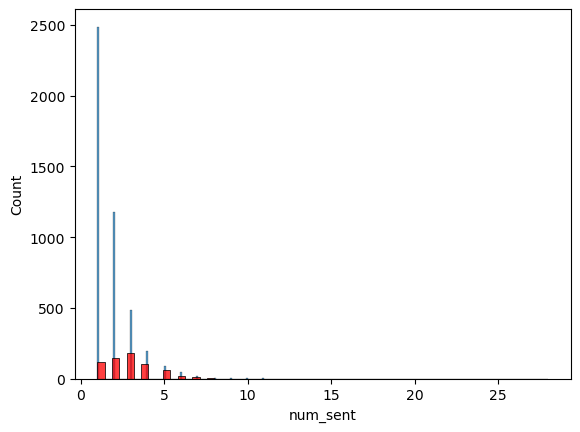

In [40]:
sns.histplot(df[df['target'] == 0]['num_sent'])
sns.histplot(df[df['target'] == 1]['num_sent'],color='r')

In [41]:
# corelation in target

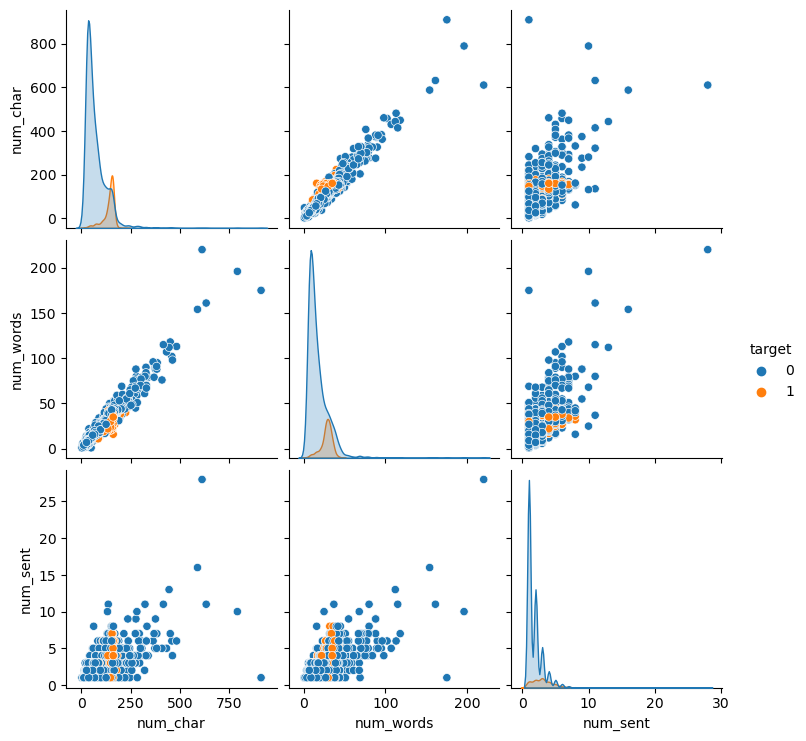

In [42]:
sns.pairplot(df,hue='target')

C:\Users\shashank_rp\AppData\Local\Temp\ipykernel_14648\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

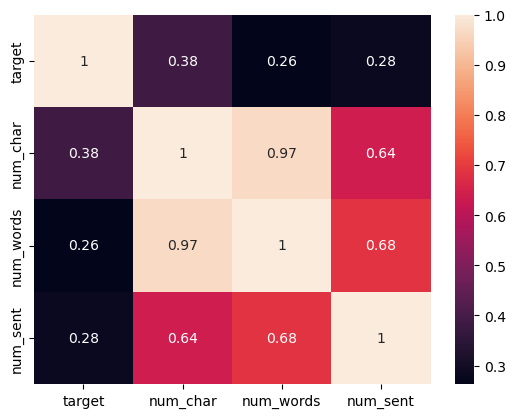

In [43]:
sns.heatmap(df.corr(),annot=True)

## Data preprocessing
* Lower case
* Tokenizer
* Removing special characters
* Removing stop punctions
* Steming

In [44]:
from nltk.corpus import stopwords
import string

In [45]:
def transform_text(text):
    #converting the text to lowercase
    text = text.lower()
    #spliting the text into string tokens
    text = nltk.word_tokenize(text)
    #only text and numbers no special characters remove all
    tlst = []
    for i in text:
        if i.isalnum():
            tlst.append(i)
    #removing the punctions
    text = tlst[:]
    tlst.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            tlst.append(i)
    #steming the words
    text = tlst[:]
    tlst.clear()
    for i in text:
        tlst.append(stemmer.stem(i))
    return " ".join(tlst)

In [46]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
transform_text('HELlo mY is hi loving colleges geitdfkdjs dfjlksfh fRieND !')

'hello hi love colleg geitdfkdj dfjlksfh friend'

In [47]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [49]:
df['transform_text'] = df['text'].apply(transform_text)

In [50]:
df.head()

,target,text,num_char,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
c = 0
for i in df['transform_text'][0].split():
    c += 1

In [52]:
c

16

In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=800,height=800,min_font_size=20,background_color='white')

In [54]:
#for spam messages
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep=" "))

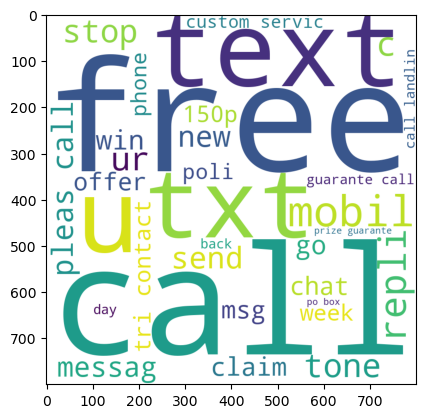

In [55]:
plt.imshow(spam_wc)
plt.show()

In [56]:
#for ham messages
ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

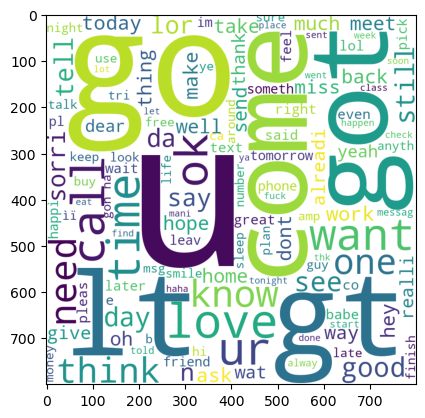

In [57]:
plt.imshow(ham_wc)
plt.show()

In [58]:
df.head()

,target,text,num_char,num_words,num_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
spam_corpus


['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [61]:
from collections import Counter

<Axes: >

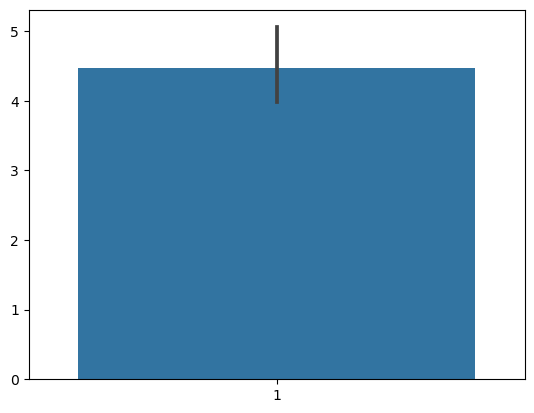

In [62]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common()))


In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

<Axes: >

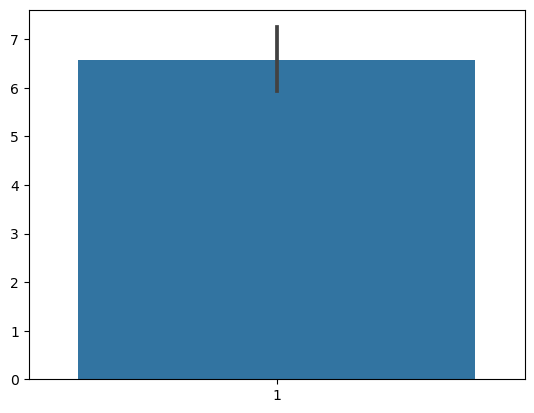

In [64]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common()))

## 4. Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [66]:
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [67]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [68]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
X.shape

(5169, 6708)

In [70]:
y = df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier

In [75]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [76]:
clfs = {
    'SVM' :svc 
    ,'KNC':knc 
    ,'MNB':mnb 
    ,'DTC':dtc
    ,'LRC':lrc
    ,'RFC':rfc
    ,'ABC':abc 
    ,'BC':bc
    ,'ETC':etc
    ,'GBDT':gbdt
    ,'XGB':xgb
}

In [77]:
def train_classfier(classifier,X_train,X_test,y_train,y_test):
    classifier.fit(X_train,y_train) 
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    pre = precision_score(y_test,y_pred)
    return acc,pre

In [78]:
train_classfier(svc,X_train,X_test,y_train,y_test)

(0.9729206963249516, 0.9741379310344828)

In [82]:
accuracyScore = []
precisionScore = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classfier(clf,X_train,X_test,y_train,y_test)
    print('Name :',name)
    print('Accuracy :',current_accuracy)
    print('Precision :',current_precision)
    accuracyScore.append(current_accuracy)
    precisionScore.append(current_precision)

Name : SVM
Accuracy : 0.9729206963249516
Precision : 0.9741379310344828
Name : KNC
Accuracy : 0.9003868471953579
Precision : 1.0
Name : MNB
Accuracy : 0.9593810444874274
Precision : 1.0
Name : DTC
Accuracy : 0.9352030947775629
Precision : 0.8380952380952381
Name : LRC
Accuracy : 0.9516441005802708
Precision : 0.94
Name : RFC
Accuracy : 0.9738878143133463
Precision : 1.0
Name : ABC
Accuracy : 0.9613152804642167
Precision : 0.9454545454545454
Name : BC
Accuracy : 0.9584139264990329
Precision : 0.8625954198473282
Name : ETC
Accuracy : 0.9758220502901354
Precision : 0.9829059829059829
Name : GBDT
Accuracy : 0.9526112185686654
Precision : 0.9238095238095239
Name : XGB
Accuracy : 0.9690522243713733
Precision : 0.9344262295081968


In [93]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracyScore,'Precision':precisionScore}).sort_values('Accuracy',ascending=False)

In [94]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.975822,0.982906
5,RFC,0.973888,1.000000
0,SVM,0.972921,0.974138
10,XGB,0.969052,0.934426
6,ABC,0.961315,0.945455
2,MNB,0.959381,1.000000
7,BC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LRC,0.951644,0.940000
3,DTC,0.935203,0.838095
